In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import neighbors
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error
from sklearn import grid_search
from sklearn import cross_validation
import statsmodels.formula.api as sm
%matplotlib inline

In [3]:
df_migration = pd.read_csv('C:\Users\Microsoft\Dropbox\Family\Vincent\DataScience\Final Project\Migration Project Data Layout.csv')
dtype={'Value':int}  


In [32]:

df_migration.head()


,Country_and_Time_Period,Migration Change,% Expenditure on healthcare,Infrastructure as % of GDP,Taxing Wages,Infant Mortality,Change in Unemployment,GDP Growth,Life Expectancy
0,Australia 2001,0.193461,7.7040,0.8,21.20,5.2,0.417217,1.928669,79.634146
1,Australia 2002,-0.068793,7.8939,0.9,21.53,5.3,-0.347638,3.100574,80.062195
2,Australia 2003,0.036371,7.8996,1.0,21.96,5.0,-0.383958,3.491209,79.848171
3,Australia 2004,0.186612,8.1103,1.2,18.63,4.8,-0.425178,4.156585,80.490244
4,Australia 2005,0.104431,7.9778,1.3,20.80,4.7,-0.258171,3.216467,80.841463


In [5]:
list(df_migration)

['Country_and_Time_Period',
 'Migration Change',
 '% Expenditure on healthcare',
 'Infrastructure as % of GDP',
 'Taxing Wages',
 'Infant Mortality',
 'Change in Unemployment',
 'GDP Growth',
 'Life Expectancy']

In [6]:
X = df_migration[['% Expenditure on healthcare',
 'Infrastructure as % of GDP',
 'Taxing Wages',
 'Infant Mortality',
 'Change in Unemployment',
 'GDP Growth',
 'Life Expectancy']]
Y= df_migration[['Migration Change']]

In [7]:
print type(X['% Expenditure on healthcare'])

<class 'pandas.core.series.Series'>


In [8]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=0.2)   

In [9]:
lr_rgr = linear_model.LinearRegression()
lr_rgr.fit(X_train,y_train)
print("coefficient {}".format(lr_rgr.coef_))
print("intercept {}".format(lr_rgr.intercept_))

LR_MSE = mean_squared_error(y_test, lr_rgr.predict(X_test))
print('Mean squared error for liner regression: {}'.format(LR_MSE))

coefficient [[-0.00570808 -0.04674604 -0.00086831 -0.00062835 -0.04489041  0.00640662
  -0.00077482]]
intercept [ 0.2190714]
Mean squared error for liner regression: 0.935513206549


In [12]:
sk_linreg_model = sk.linear_model.LinearRegression()
scaled_test_x = sk.preprocessing.scale(X_test)
scaled_train_x = sk.preprocessing.scale(X_train)
sk_linreg_model.fit(scaled_train_x,y_train.values)

linreg_error = mean_squared_error(y_test,sk_linreg_model.predict(scaled_test_x))
print('Linear Mean Squared Error is',linreg_error)
print 'Linear Regression Model Coefficients Are:' 
print([i for i in zip(sk_linreg_model.coef_,X_test.keys())])

('Linear Mean Squared Error is', 0.93436639372235319)
Linear Regression Model Coefficients Are:
[(array([-0.0110035 , -0.01932493, -0.00914458, -0.00252218, -0.05282522,
        0.01978495, -0.0020074 ]), '% Expenditure on healthcare')]


In [44]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 20)
knn_error = mean_squared_error(knn.fit(scaled_train_x, y_train).predict(scaled_test_x),y_test.values)
print('KNN Mean Squared Error is',knn_error)

('KNN Mean Squared Error is', 0.94342692802416317)


In [17]:
param_grid = [{'n_neighbors': range(1,50)}]

knn = neighbors.KNeighborsRegressor()
knn_cv = grid_search.GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(scaled_train_x, y_train.values)

knn_error = mean_squared_error(knn_cv.predict(scaled_test_x),y_test.values)
print('KNN Mean Squared Error is',knn_error)
print('Best n_neighbors is',knn_cv.best_params_['n_neighbors'])

('KNN Mean Squared Error is', 0.94532650993480338)
('Best n_neighbors is', 21)


In [25]:
param_grid = [{'alpha': np.linspace(1e-10, 1, 50)}]

lasso_rgr = Lasso()
lasso_cv = grid_search.GridSearchCV(lasso_rgr, param_grid, cv=5)
lasso_cv.fit(scaled_train_x, y_train.values)
lasso_error = mean_squared_error(lasso_cv.predict(scaled_test_x),y_test.values)

print('Lasso Mean Squared Error is',lasso_error)
print('Best alpha is',lasso_cv.best_params_['alpha'])
print('Lasso Regression Model Coefficients Are:')
print([i for i in zip(lasso_cv.best_estimator_.coef_,X_train.keys())])

('Lasso Mean Squared Error is', 0.93450912251336626)
('Best alpha is', 0.020408163363265307)
Lasso Regression Model Coefficients Are:
[(-0.0, '% Expenditure on healthcare'), (-0.0, 'Infrastructure as % of GDP'), (-0.0, 'Taxing Wages'), (0.0, 'Infant Mortality'), (-0.042328027236762066, 'Change in Unemployment'), (0.007746770045713865, 'GDP Growth'), (-0.0, 'Life Expectancy')]


In [45]:
param_grid = [{'alpha': np.linspace(1e-10, 1, 50)}]
ridge_rgr = Ridge()
ridge_cv = grid_search.GridSearchCV(ridge_rgr, param_grid, cv=5)
ridge_cv.fit(scaled_train_x, y_train.values)
ridge_error = mean_squared_error(ridge_cv.predict(scaled_test_x),y_test.values)

print('Ridge Mean Squared Error is',ridge_error)
print('Best alpha is',ridge_cv.best_params_['alpha'])
print('Ridge Regression Model Coefficients Are:')
print([i for i in zip(ridge_cv.best_estimator_.coef_,X_train.keys())])

('Ridge Mean Squared Error is', 0.93437424392385726)
('Best alpha is', 1.0)
Ridge Regression Model Coefficients Are:
[(array([-0.01097777, -0.01926323, -0.00910357, -0.00248135, -0.05263775,
        0.01985519, -0.00197911]), '% Expenditure on healthcare')]


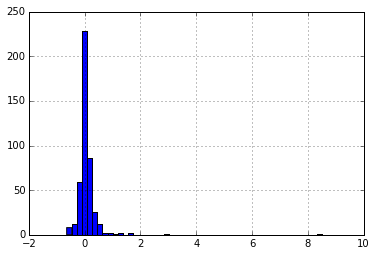

In [36]:
df_migration['Migration Change'].hist(bins=50)

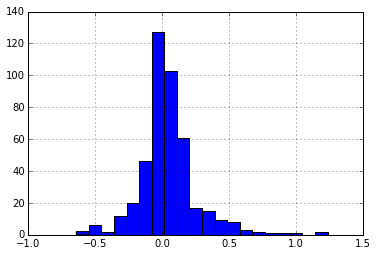

In [40]:
df_migration[df_migration['Migration Change']<1.5]['Migration Change'].hist(bins=20)